<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment04/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 04. Linear regression with multiple variables - 20145822 김영현
---
## 1. Plot the estimated parameters using the training dataset
- I created a new functions to solve **"Linear regression with multiple variables"** based on the function I implemented in the last assignment.
- The logic used in the previous task was used as it was, and it was confirmed that **all the $\theta(\theta_0, \theta_1, \theta_2 ,\theta_3)$ and error($J(\theta_0, \theta_1, \theta_2 ,\theta_3)$) values converged.**
## 2. Plot the training error using the training dataset
- Same as the second content in # 1.
## 3. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence
- I calculate the testing error $J(\theta_0, \theta_1, \theta_2 ,\theta_3) = \frac{1}{2 m} \sum_{i=1}^m ( \theta_0 + \theta_1 x^{(i)} + \theta_2 y^{(i)} + \theta_3 z^{(i)} - h^{(i)} )^2$.
- In the above calculation, $\theta(\theta_0, \theta_1, \theta_2 ,\theta_3)$ values were used from the training iteration.
- In the above calculation, $x, y, z$, and $h$ values were used from the testing dataset.



[135321.01558668475, 112266.66892282823, 93161.02478167617, 77327.75441143582, 64206.369790200915, 53332.38257281665, 44320.86138813487, 36852.80542151789, 30663.851912829974, 25534.917819835213, 21284.444365606178, 17761.969930005776, 14842.803768155582, 12423.61200764227, 10418.759670518122, 8757.279229128972, 7380.358383850797, 6239.258131066002, 5293.587421813275, 4509.873334713271, 3860.3761478602096, 3322.1073636953197, 2876.0159253332636, 2506.3138167228394, 2199.917173155944, 1945.983117658926, 1735.5259274587684, 1561.098942969586, 1416.5309590040606, 1296.7077665634604, 1197.391111872518, 1115.068663880923, 1046.829679140696, 990.2619626454716, 943.3664770864237, 904.486577726402, 872.2493678349912, 845.5170986901816, 823.3468937260545, 804.9573710773072, 789.7009829719879, 777.0410927979017, 766.5329783799956, 757.808088992268, 750.5609988086829, 744.5385949504549, 739.5311173908678, 735.364733533814, 731.8953846090938, 729.0036860493199, 726.5907013237897, 724.5744396247211

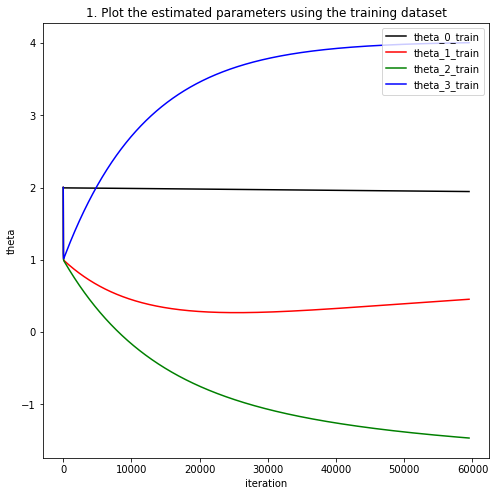

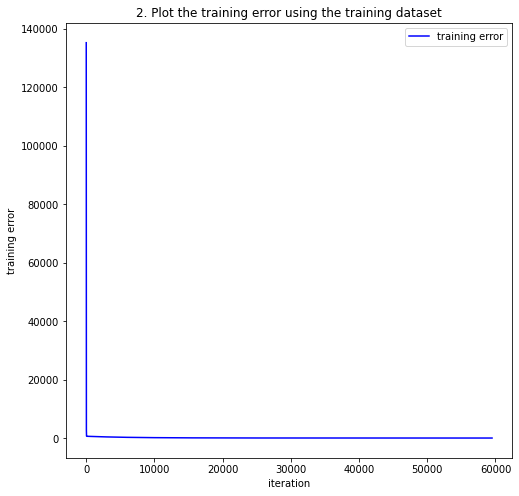

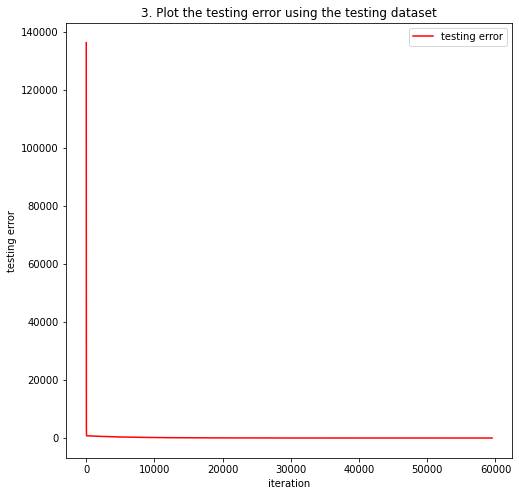

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

# Input data file read
# train sets
x_train = []
y_train = []
z_train = []
h_train = []

with open('/content/drive/My Drive/Colab Notebooks/data04/data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
      x_train.append(float(i[0]))
      y_train.append(float(i[1]))
      z_train.append(float(i[2]))
      h_train.append(float(i[3]))

# test sets
x_test = []
y_test = []
z_test = []
h_test = []

with open('/content/drive/My Drive/Colab Notebooks/data04/data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
      x_test.append(float(i[0]))
      y_test.append(float(i[1]))
      z_test.append(float(i[2]))
      h_test.append(float(i[3]))

# linear_model return the value's list of the linear_model
def linear_model(theta_0, theta_1, theta_2, theta_3, x, y, z):
  linear_model = []
  for i in range(len(x)):
    func_val = theta_0 + (theta_1 * x[i]) + (theta_2 * y[i]) + (theta_3 * z[i])
    linear_model.append(func_val)
  return linear_model

# objective_function return the objective function value
# by calculating with linear_model given thetas
def objective_function(linear_model, h):
  sum = 0
  for i in range(len(h)):
    sub = linear_model[i] - h[i]
    sum += sub ** 2

  return sum/(2 * len(h))
# theta_desc return the next theta
# Separate each theta by key value
def theta_desc(theta, linear_model, h, alpha, x, y, z, key):
  sum = 0
  for i in range(len(x)):
    sub = linear_model[i] - h[i]
    if key == 0:
      sum += sub
    elif key == 1:
      sum += sub * x[i]
    elif key == 2:
      sum += sub * y[i]
    elif key == 3:
      sum += sub * z[i]
      
  return theta - (alpha * sum/len(h))

# list for store theta values
theta_0_train_list = []
theta_1_train_list = []
theta_2_train_list = []
theta_3_train_list = []
ob_list = []
ob_test_list = []

# theta value for each training set iteration
# initial conditions
theta_0_train = 2
theta_1_train = 2
theta_2_train = 2
theta_3_train = 2

# objective function value for each iteration
ob_value = 0
# running rate
alpha = 0.000001
threshold = 0.0001
# iteration counter
iteration = 0

# iteration for training set
while True:
  # function values for training and testing data
  # important: iteration for gradient descent can handle with only training set
  # theta can only deal with training data 
  func_train = linear_model(theta_0_train, theta_1_train, theta_2_train, theta_3_train, x_train, y_train, z_train)
  func_test = linear_model(theta_0_train, theta_1_train, theta_2_train, theta_3_train, x_test, y_test, z_test)
  # error calculation for training and testing data
  ob_value = objective_function(func_train, h_train)
  ob_test_value = objective_function(func_test, h_test)
  # store training theta change for this iteration
  theta_0_train_list.append(theta_0_train)
  theta_1_train_list.append(theta_1_train)
  theta_2_train_list.append(theta_2_train)
  theta_3_train_list.append(theta_3_train)
  # store error value for each data into each list
  ob_list.append(ob_value)
  ob_test_list.append(ob_test_value)

  # escape rule
  if iteration > 1:
    if ob_list[iteration-1] - ob_list[iteration] < threshold:
      iteration += 1
      break

  # gradient descent for training theta
  theta_0_train = theta_desc(theta_0_train, func_train, h_train, alpha, x_train, y_train, z_train, 0)
  theta_1_train = theta_desc(theta_1_train, func_train, h_train, alpha, x_train, y_train, z_train, 1)
  theta_2_train = theta_desc(theta_2_train, func_train, h_train, alpha, x_train, y_train, z_train, 2)
  theta_3_train = theta_desc(theta_3_train, func_train, h_train, alpha, x_train, y_train, z_train, 3)
  iteration += 1

# 1. Plot the estimated parameters using the training dataset
# theta at every iteration of gradient descent until convergence
# theta 0: black
# theta 1: red
# theta 2: green
# theta 3: blue
iterations = [i for i in range(iteration)]
plt.figure(1, figsize=(8,8))
plt.title("1. Plot the estimated parameters using the training dataset")
plt.xlabel("iteration")
plt.ylabel("theta")
plt.plot(iterations, theta_0_train_list, c='k', label="theta_0_train")
plt.plot(iterations, theta_1_train_list, c='r', label="theta_1_train")
plt.plot(iterations, theta_2_train_list, c='g', label="theta_2_train")
plt.plot(iterations, theta_3_train_list, c='b', label="theta_3_train")
plt.legend(loc='upper right')

# 2. Plot the training error using the training dataset
# plot the training error J at every iteration in blue color
plt.figure(2, figsize=(8,8))
plt.title("2. Plot the training error using the training dataset" )
plt.xlabel("iteration")
plt.ylabel("training error")
plt.plot(iterations, ob_list, c='b', label="training error")
plt.legend()

# 3. Plot the testing error using the testing dataset
# plot the testing error J at every iteration in red color
plt.figure(3, figsize=(8,8))
plt.title("3. Plot the testing error using the testing dataset" )
plt.xlabel("iteration")
plt.ylabel("testing error")
plt.plot(iterations, ob_test_list, c='r', label="testing error")
plt.legend()

plt.show()







In [0]:

()